# Projeto III

> Por Matheus Henrique de Cerqueira Pinto (11911104)

## Preparação

In [1]:
# Bibliotecas úteis
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Configura o grid do Seaborn
sns.set(style="darkgrid")

---

## Questão 1

### a) Carregando os dados

In [2]:
# Lê o .csv
df = pd.read_csv('data/hour.csv')

# Exibe parcialmente o DataFrame
df.head(3)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32


### b) Entendendo os dados

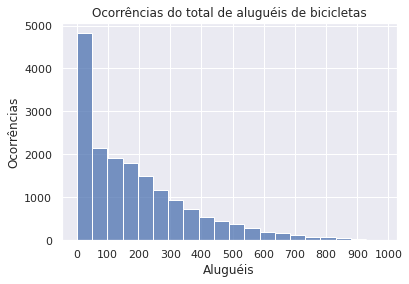

In [3]:
# Plota a ocorrência do total de aluguéis
sns.histplot(x=df['cnt'], bins=20)
plt.xlabel("Aluguéis")
plt.ylabel("Ocorrências")
plt.xticks(list(range(0, 1001, 100)))
plt.title("Ocorrências do total de aluguéis de bicicletas")
plt.show()

**Comentário**: É visível a concentração de ocorrências de aluguéis na faixa precedente a 100 aluguéis, com, aproximadamente, 5000 ocorrências. A partir disso, o número de ocorrências diminui gradativamente.

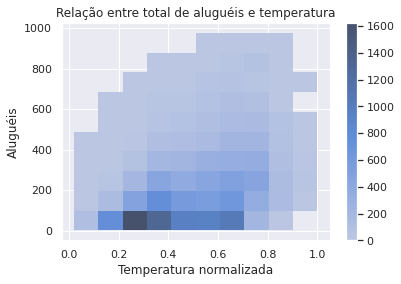

In [4]:
# Plota a relação entre total de aluguéis e temperatura
sns.histplot(data=df[['temp', 'cnt']], x='temp', y='cnt', bins=10, cbar=True)
plt.xlabel("Temperatura normalizada")
plt.ylabel("Aluguéis")
plt.title("Relação entre total de aluguéis e temperatura")
plt.show()

**Comentário**: É visível a concentração de ocorrências de aluguéis nas áreas correspondentes entre 0.2 a 0.6 da temperatura e na contagem de 0 a 400 de número de aluguéis, com regiões chegando a 1600 ocorrências, conforme mostra o gráfico.

---

## Questão 2

In [5]:
# Visualiza o cabeçalho do DataFrame
df.head(3)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32


### a) Variáveis explicativas

Das variáveis do dataset, fazem parte do X *season*, *yr*, *mnth*, *holiday*, *weekday*, *workingday*, *weathersit*, *temp*, *atemp*, *hum* e *windspeed*.

### b) Variáveis futuras, mas não resposta

Das variáveis do dataset, são futuras *casual* e *registered*.

### c) Variáveis metadados

Apenas as variáveis *instant* e *dteday* representam metadados.

---

## Questão 3

### a) Divisão da base

In [6]:
# Descarta as variáveis metadados
df = df.drop(['dteday', 'instant'], axis=1)

In [7]:
# Separa a base de treino
train_df = df[df.yr == 0].reset_index(drop=True)
X_train = train_df[train_df.columns.difference(
    ['casual', 'registered', 'cnt', 'yr'])]
y_train = train_df['cnt']

In [8]:
# Separa a base de teste
test_df  = df[df.yr == 1].reset_index(drop=True)
X_test = test_df[test_df.columns.difference(
    ['casual', 'registered', 'cnt', 'yr'])]
y_test = test_df['cnt']

**Comentário**: Após esse passo, a base se encontra dividida entre os anos de 2011 e 2012, sem as colunas *dteday* e *instant* (metadados), *casual* e *registered* (variáveis futuras), *cnt* (variável resposta) e *yr* (variável da divisão da base, irrelevante). 

### b) Transformando variáveis qualitativas

In [9]:
# Importa o encoder
from sklearn.preprocessing import OneHotEncoder

In [10]:
# Define as colunas categóricas
cols = ['hr', 'mnth', 'season', 'weekday', 'weathersit']

# Treina o encoder
encoder = OneHotEncoder(sparse=False)
encoder.fit(X_train[cols])
col_names = encoder.get_feature_names(cols)

In [11]:
# Transforma as categorias de treino e adiciona ao DataFrame
alt_train = encoder.transform(X_train[cols])
alt_train_df = pd.DataFrame(alt_train, columns=col_names, index=X_train.index)
X_train = X_train.drop(cols, axis=1)
X_train = pd.concat([X_train, alt_train_df], axis=1)

# Exibe o DataFrame
X_train

,atemp,holiday,hum,temp,windspeed,workingday,hr_0,hr_1,hr_2,hr_3,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,0.2879,0,0.81,0.24,0.0000,0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.2727,0,0.80,0.22,0.0000,0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.2727,0,0.80,0.22,0.0000,0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.2879,0,0.75,0.24,0.0000,0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.2879,0,0.75,0.24,0.0000,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8640,0.4242,0,0.54,0.42,0.2239,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
8641,0.4242,0,0.54,0.42,0.2239,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
8642,0.4091,0,0.58,0.40,0.1940,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
8643,0.3939,0,0.62,0.38,0.1343,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [12]:
# Transforma as categorias de teste e adiciona ao DataFrame
alt_test = encoder.transform(X_test[cols])
alt_test_df = pd.DataFrame(alt_test, columns=col_names, index=X_test.index)
X_test = X_test.drop(cols, axis=1)
X_test = pd.concat([X_test, alt_test_df], axis=1)

# Exibe o DataFrame
X_test

,atemp,holiday,hum,temp,windspeed,workingday,hr_0,hr_1,hr_2,hr_3,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,0.3788,0,0.66,0.36,0.0000,0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.3485,0,0.66,0.36,0.1343,0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.3485,0,0.76,0.32,0.0000,0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.3333,0,0.81,0.30,0.0000,0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.3030,0,0.81,0.28,0.0896,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8729,0.2576,0,0.60,0.26,0.1642,1,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8730,0.2576,0,0.60,0.26,0.1642,1,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8731,0.2576,0,0.60,0.26,0.1642,1,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8732,0.2727,0,0.56,0.26,0.1343,1,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


**Comentário**: Ao final do passo, as variáveis categóricas *hr*, *mnth*, *season*, *weekday* e *weathersit* foram transformadas em variáveis *dummies* e as bases de treino e teste, após a concatenação do DataFrame gerado com o OneHotEncoder, ficaram com 57 colunas.

---

## Questão 4

In [13]:
# Importa o modelo para MAE
from sklearn.metrics import mean_absolute_error

# Importa o modelo para o regressor MLP
from sklearn.neural_network import MLPRegressor

In [15]:
# Treina o primeiro regressor
reg_1 = MLPRegressor(
    hidden_layer_sizes=[],
    random_state=42
    ).fit(X_train, y_train)

# Exibe o MAE
print("MAE obtido sem camadas intermediárias: " + str(mean_absolute_error(y_test, reg_1.predict(X_test))) + ".")

MAE obtido sem camadas intermediárias: 188.5764021155384.


/home/matheus/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [21]:
# Treina o segundo regressor
reg_2 = MLPRegressor(
    hidden_layer_sizes=[10],
    random_state=42
    ).fit(X_train, y=y_train)

# Exibe o MAE
print("MAE obtido com uma camada intermediária de 10 neurônios: " + str(mean_absolute_error(y_test, reg_2.predict(X_test))) + ".")

reg_2.(X_test, y_test)

MAE obtido com uma camada intermediária de 10 neurônios: 106.14782515744196.


/home/matheus/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.482534356245364

In [20]:
# Treina o terceiro regressor
reg_3 = MLPRegressor(
    hidden_layer_sizes=[10,10],
    random_state=42
    ).fit(X_train, y=y_train)
    
# Exibe o MAE
print("MAE obtido com duas camadas intermediárias de 10 neurônios: " + str(mean_absolute_error(y_test, reg_3.predict(X_test))) + ".")


MAE obtido com duas camadas intermediárias de 10 neurônios: 94.93970577796865.


/home/matheus/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.5907523441320727

**Comentário**: É evidente que com o modelo configurado com duas camadas intermediárias de 10 neurônios cada, foi obtido um menor MAE. Entretanto, em nenhum dos casos o modelo convergiu (notável através dos *warnings* gerados na execução). Além disso, o erro obtido pelos modelos ainda é alto, sendo necessária otimização nos parâmetros para a obtenção de melhores resultados.